In [2334]:
# Import and clean
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

pd.options.display.max_columns = 999  # Allos us to display all columns
pd.options.display.max_rows = 999  # Allos us to display all columns

df = df.reindex(sorted(df.columns),axis=1)  # puts cols in alpabetic order
df.columns = df.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case
df.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [2335]:
df.shape   # 81 columns (features)   2051 rows

(2051, 81)

In [2336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st flr sf       2051 non-null   int64  
 1   2nd flr sf       2051 non-null   int64  
 2   3ssn porch       2051 non-null   int64  
 3   alley            140 non-null    object 
 4   bedroom abvgr    2051 non-null   int64  
 5   bldg type        2051 non-null   object 
 6   bsmt cond        1996 non-null   object 
 7   bsmt exposure    1993 non-null   object 
 8   bsmt full bath   2049 non-null   float64
 9   bsmt half bath   2049 non-null   float64
 10  bsmt qual        1996 non-null   object 
 11  bsmt unf sf      2050 non-null   float64
 12  bsmtfin sf 1     2050 non-null   float64
 13  bsmtfin sf 2     2050 non-null   float64
 14  bsmtfin type 1   1996 non-null   object 
 15  bsmtfin type 2   1995 non-null   object 
 16  central air      2051 non-null   object 
 17  condition 1   

In [2337]:
df.describe().T  # Use .T to transpose and make it easier to read
# I don't see any negative min numbers

,count,mean,std,min,25%,50%,75%,max
1st flr sf,2051.0,1.164488e+03,3.964469e+02,334.0,879.5,1093.0,1.405000e+03,5095.0
2nd flr sf,2051.0,3.293291e+02,4.256710e+02,0.0,0.0,0.0,6.925000e+02,1862.0
3ssn porch,2051.0,2.591419e+00,2.522961e+01,0.0,0.0,0.0,0.000000e+00,508.0
bedroom abvgr,2051.0,2.843491e+00,8.266183e-01,0.0,2.0,3.0,3.000000e+00,8.0
bsmt full bath,2049.0,4.275256e-01,5.226732e-01,0.0,0.0,0.0,1.000000e+00,3.0
bsmt half bath,2049.0,6.344558e-02,2.517052e-01,0.0,0.0,0.0,0.000000e+00,2.0
bsmt unf sf,2050.0,5.677283e+02,4.449548e+02,0.0,220.0,474.5,8.110000e+02,2336.0
bsmtfin sf 1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0
bsmtfin sf 2,2050.0,4.795902e+01,1.650009e+02,0.0,0.0,0.0,0.000000e+00,1474.0
enclosed porch,2051.0,2.257192e+01,5.984511e+01,0.0,0.0,0.0,0.000000e+00,432.0


In [2338]:
df.describe(include=[object])  #describes all of the object or string features

,alley,bldg type,bsmt cond,bsmt exposure,bsmt qual,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,foundation,functional,garage cond,garage finish,garage qual,garage type,heating,heating qc,house style,kitchen qual,land contour,land slope,lot config,lot shape,ms zoning,mas vnr type,misc feature,neighborhood,paved drive,pool qc,roof matl,roof style,sale type,street,utilities
count,140,2051,1996,1993,1996,1996,1995,2051,2051,2051,2051,2051,2051,2051,2051,400,1051,2051,2051,1937,1937,1937,1938,2051,2051,2051,2051,2051,2051,2051,2051,2051,2029,65,2051,2051,9,2051,2051,2051,2051,2051
unique,2,5,5,4,5,6,6,2,9,8,5,5,4,15,15,4,5,6,8,5,3,5,6,5,5,8,4,4,3,5,4,7,4,5,28,3,4,6,6,9,2,3
top,Grvl,1Fam,TA,No,TA,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Gd,CompShg,Gable,WD,Pave,AllPub
freq,85,1700,1834,1339,887,615,1749,1910,1767,2025,1868,1778,1247,724,721,227,523,926,1915,1868,849,1832,1213,2018,1065,1059,1047,1843,1953,1503,1295,1598,1218,56,310,1861,4,2025,1619,1781,2044,2049


In [2339]:
df.isnull().sum()   
# Look at the columns with fewer Nan's first. 
# A lot of the basement features are NaN in similar amounts.  
# The same for garages.

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond            55
bsmt exposure        58
bsmt full bath        2
bsmt half bath        2
bsmt qual            55
bsmt unf sf           1
bsmtfin sf 1          1
bsmtfin sf 2          1
bsmtfin type 1       55
bsmtfin type 2       56
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond         114
garage finish       114
garage qual         114
garage type         113
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [2340]:
df[df['bsmt full bath'].isnull()].head() 


# It looks like 616 is a slab foundation, and 1327 is a poured concrete foundation.  
# Thay may not have basements at all, so the NaN values might need to be 0
# Documentation says that Bsmt Qual should be NA if there is no basement
# same for bsmt cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
616,3820,0,0,NaN,5,1Fam,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,1498,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,908154080,Y,0,NaN,CompShg,Gable,WD,284700,0,Pave,11,0.0,AllPub,0,1959,1996,2008
1327,896,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [2341]:
df['bsmt qual'].value_counts()
# it looks like the NA is missing

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt qual, dtype: int64

In [2342]:
df['bsmt qual'].isnull().value_counts()   # 55 NaN's to replace with 'NA'

False    1996
True       55
Name: bsmt qual, dtype: int64

In [2343]:
df['bsmt qual'] = df['bsmt qual'].fillna('NA')
df_test['bsmt qual'] = df_test['bsmt qual'].fillna('NA')

df['bsmt qual'].value_counts()  

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: bsmt qual, dtype: int64

In [2344]:
basement_to_fix = ['bsmt cond','bsmt exposure','bsmtfin type 1','bsmtfin type 2']  # all of these need to be fixed too

In [2345]:
# [ df[bsmt] = df[bsmt].fillna('NA') for bsmt in basement_to_fix ]  # can't get the list comp to work

In [2346]:
for bsmt in basement_to_fix:
    df[bsmt] = df[bsmt].fillna('NA')   # Replace NaN with 'NA' for all of the columns above
    

In [2347]:
   
for bsmt in basement_to_fix:
    df_test [bsmt] = df_test [bsmt].fillna('NA')   # Replace NaN with 'NA' for all of the columns above

In [2348]:
df[df['bsmt full bath'].isnull()].head()  
# bsmt full bath, bsmt half bath, bsmt unf sf, bsmtfin sf 1, bsmtfin sf 2 
# could all be 0 since there is no basement 
# **IF** there really is no basement

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
616,3820,0,0,NaN,5,1Fam,NA,NA,NaN,NaN,NA,0.0,0.0,0.0,NA,NA,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,1498,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,908154080,Y,0,NaN,CompShg,Gable,WD,284700,0,Pave,11,0.0,AllPub,0,1959,1996,2008
1327,896,0,0,NaN,2,1Fam,NA,NA,NaN,NaN,NA,NaN,NaN,NaN,NA,NA,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [2349]:
df[df['bsmt qual']=='NA'].head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
12,1288,728,0,NaN,4,1Fam,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,Y,Feedr,Norm,SBrkr,0,TA,Gd,HdBoard,HdBoard,NaN,TA,1,PConc,1,Mod,576.0,2.0,TA,Unf,TA,Attchd,1900.0,2016,0,GasA,Ex,2Story,807,1,TA,Bnk,Gtl,26400,FR2,120.0,Reg,0,70,RL,0.0,None,NaN,0,6,SawyerW,0,7,5,906226060,P,0,NaN,CompShg,Gable,WD,131000,0,Pave,7,0.0,AllPub,0,1880,2007,2009
93,1535,0,0,NaN,4,Duplex,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,NaN,0,Slab,2,Typ,400.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,811,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,906226100,Y,0,NaN,CompShg,Gable,WD,118858,0,Pave,8,0.0,AllPub,0,1979,1979,2009
114,660,0,0,NaN,2,1Fam,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,N,Norm,Norm,SBrkr,100,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,Slab,1,Min2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,660,0,GasA,Fa,1Story,781,1,Fa,Lvl,Gtl,9000,Corner,NaN,Reg,0,20,RL,0.0,None,NaN,0,6,Sawyer,0,2,2,905228050,N,0,NaN,CompShg,Gable,WD,63900,0,Pave,5,0.0,AllPub,0,1947,1950,2009
146,495,1427,0,NaN,4,1Fam,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,Y,Norm,Norm,SBrkr,177,TA,Gd,HdBoard,HdBoard,NaN,Ex,1,Slab,3,Typ,672.0,2.0,TA,RFn,TA,BuiltIn,2003.0,1922,0,GasA,Ex,SFoyer,888,1,Gd,Lvl,Gtl,7301,Corner,64.0,Reg,0,85,RL,500.0,BrkFace,NaN,0,7,Edwards,0,5,7,908128060,Y,0,NaN,CompShg,Gable,ConLD,198500,0,Pave,7,0.0,AllPub,0,2003,2003,2009
183,733,0,0,NaN,2,1Fam,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NaN,NaN,0,Slab,1,Sal,487.0,2.0,Po,Unf,Fa,Attchd,1952.0,733,0,Wall,Po,1Story,1554,1,Fa,Low,Mod,14584,Inside,80.0,Reg,0,20,A (agr),0.0,None,NaN,0,2,IDOTRR,0,5,1,910251050,N,0,NaN,CompShg,Gable,WD,13100,0,Pave,4,0.0,AllPub,0,1952,1952,2008


In [2350]:
basement_to_fix = ['bsmt full bath','bsmt half bath','bsmt unf sf','bsmtfin sf 1','bsmtfin sf 2']
for bsmt in basement_to_fix:
    df[bsmt] = df[bsmt].fillna(0)   # Replace NaN with 0 for all of the columns above
    
for bsmt in basement_to_fix:
    df_test[bsmt] = df_test[bsmt].fillna(0)     

In [2351]:
df[df['bsmt full bath'].isnull()].head()  # Verifying they have been fixed

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold


In [2352]:
df.isnull().sum()     # basement features look good now, garage 

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond         114
garage finish       114
garage qual         114
garage type         113
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [2353]:
df['garage type'].value_counts()  

# Documentation says that garag qual should be NA if there is no basement, NA is missing
# same for Garage Finish, Garage Qual, Garage Cond

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage type, dtype: int64

In [2354]:
garage_to_fix = ['garage type','garage finish', 'garage qual', 'garage cond']
for grg in garage_to_fix:
    df[grg] = df[grg].fillna('NA')    # Replace NaN with NA for all of the columns above
    
for grg in garage_to_fix:
    df_test[grg] = df_test[grg].fillna('NA')    # Replace NaN with NA for all of the columns above  

In [2355]:
df.isnull().sum()     # Garage values look better, except for garage area(1), garage cars(1), and garage yr blt(114) ?

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [2356]:
df[df['garage area'].isnull()].head()    # looks like there is no garage here, so garage area and garage cars should both be 0

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1712,942,886,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,311.0,548.0,0.0,ALQ,Unf,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,NaN,NaN,NA,NA,NA,Detchd,NaN,1828,0,GasA,Ex,2Story,2237,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,910201180,Y,0,NaN,CompShg,Gable,WD,150909,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [2357]:
df['garage area'] = df['garage area'].fillna(0)
df['garage cars'] = df['garage cars'].fillna(0)

df_test['garage area'] = df_test['garage area'].fillna(0)
df_test['garage cars'] = df_test['garage cars'].fillna(0)

In [2358]:
df.isnull().sum() # Verifying that garage looks good except for garage yr blt, probably should be 0 or na? if there is no garage

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [2359]:
garage_check = df[df['garage type']=='NA'] 
garage_check['garage yr blt'].value_counts()   # For all of the garage type NA, there isn't a single value for garage yr blt.  Those should be NA

Series([], Name: garage yr blt, dtype: int64)

In [2360]:
df[df['garage yr blt']=='NA'] # There are no other NA's, and the documentation isn't clear.  We will be putting in NA's to get rid of the nulls

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold


In [2361]:
df['garage yr blt'] = df['garage yr blt'].fillna('NA')
df_test['garage yr blt'] = df_test['garage yr blt'].fillna('NA')

df['garage yr blt'].isnull().sum() # No more null values

0

In [2362]:
df.isnull().sum() # Looking for other small hits
# total bsmt sf probably should have been fixed with the other basement stuff

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [2363]:
df[df['total bsmt sf'].isnull()].head()  # looks like there is not basement anyway

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1327,896,0,0,NaN,2,1Fam,NA,NA,0.0,0.0,NA,0.0,0.0,0.0,NA,NA,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [2364]:
df['total bsmt sf'].value_counts() # looks like this should be 0

0.0       54
864.0     51
672.0     20
1040.0    20
912.0     17
816.0     17
1008.0    14
768.0     14
728.0     14
600.0     13
384.0     13
756.0     12
960.0     11
624.0     10
988.0     10
894.0     10
780.0     10
832.0     10
483.0     10
936.0     10
720.0      9
546.0      9
848.0      9
928.0      8
630.0      8
896.0      8
952.0      8
796.0      7
990.0      7
876.0      7
1073.0     7
855.0      7
884.0      7
1092.0     7
738.0      7
784.0      7
1054.0     6
1405.0     6
572.0      6
910.0      6
698.0      6
1080.0     6
970.0      6
845.0      6
1200.0     6
1362.0     6
840.0      6
725.0      6
926.0      6
660.0      6
1057.0     6
686.0      5
808.0      5
847.0      5
520.0      5
732.0      5
680.0      5
1494.0     5
1050.0     5
858.0      5
747.0      5
925.0      5
1208.0     5
924.0      5
948.0      5
1056.0     5
793.0      5
1143.0     5
1078.0     5
1168.0     5
976.0      5
684.0      5
1100.0     5
880.0      5
1440.0     5
1152.0     5
1800.0     5

In [2365]:
df['total bsmt sf'] = df['total bsmt sf'].fillna('NA') 
df_test['total bsmt sf'] = df_test['total bsmt sf'].fillna('NA') 

In [2366]:
df.isnull().sum() # generally looking good
# little stuff to fix includes 'mas vnr area' and ' mas vnr type '
# big hits include 'alley', 'fence', 'fireplace qu','lot frontage','misc feature','pool qc '

# 'mas vnr type' should include a None value, so 'mas vnr area' should probablly include 0's

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [2367]:
df[df['mas vnr area'].isnull()]
# looks like all the 'mas vnr area' NaN's are also 'mas vnr type' NaN's.   Setting type to None, and area to 0.

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
22,1209,1044,0,NaN,3,1Fam,TA,Av,0.0,0.0,Ex,1209.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,Gd,1,PConc,2,Typ,575.0,2.0,TA,Fin,TA,Attchd,2005.0,2253,1,GasA,Ex,2Story,2393,1,Ex,Lvl,Gtl,12867,Corner,103.0,IR1,0,60,RL,NaN,NaN,NaN,0,7,NridgHt,142,5,8,528142010,Y,0,NaN,CompShg,Gable,New,344133,0,Pave,8,1209.0,AllPub,243,2005,2006,2006
41,2076,0,0,NaN,2,1Fam,Gd,Gd,1.0,0.0,Ex,690.0,1386.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,850.0,3.0,TA,Fin,TA,Attchd,2006.0,2076,1,GasA,Ex,1Story,2383,1,Ex,Lvl,Gtl,13891,Inside,107.0,Reg,0,20,RL,NaN,NaN,NaN,0,9,NridgHt,229,5,10,528110050,Y,0,NaN,CompShg,Gable,New,465000,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
86,1200,0,0,NaN,2,1Fam,TA,No,1.0,0.0,Gd,343.0,833.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003.0,1200,0,GasA,Ex,1Story,539,1,Gd,Lvl,Gtl,10083,Inside,67.0,Reg,0,20,RL,NaN,NaN,NaN,0,8,SawyerW,41,5,7,531371050,Y,0,NaN,CompShg,Gable,WD,184900,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
212,1436,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Ex,1436.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,529.0,2.0,TA,Fin,TA,Attchd,2008.0,1436,0,GasA,Ex,1Story,518,1,Gd,Lvl,Gtl,7993,Inside,90.0,IR1,0,20,FV,NaN,NaN,NaN,0,10,Somerst,121,5,7,528458020,Y,0,NaN,CompShg,Gable,New,225000,0,Pave,6,1436.0,AllPub,0,2008,2009,2009
276,914,0,0,NaN,2,1Fam,TA,Av,1.0,0.0,Gd,142.0,475.0,297.0,GLQ,ALQ,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,0.0,0.0,NA,NA,NA,NA,NA,914,0,GasA,Ex,1Story,2824,1,Gd,Lvl,Gtl,8050,Inside,75.0,Reg,0,20,RL,NaN,NaN,NaN,0,4,Edwards,0,5,6,908130020,N,0,NaN,CompShg,Gable,WD,117250,0,Pave,4,914.0,AllPub,32,2002,2002,2006
338,955,925,0,NaN,3,1Fam,TA,Av,1.0,0.0,Ex,210.0,745.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,WdShing,Wd Shng,NaN,Gd,1,PConc,2,Typ,880.0,3.0,TA,Fin,TA,Attchd,2007.0,1880,1,GasA,Ex,2Story,1800,1,Ex,Lvl,Gtl,12217,Inside,112.0,IR1,0,60,FV,NaN,NaN,NaN,0,12,Somerst,127,5,8,528458150,Y,0,NaN,CompShg,Hip,New,310013,0,Pave,8,955.0,AllPub,168,2007,2007,2007
431,1128,903,0,NaN,3,1Fam,TA,No,1.0,0.0,Gd,324.0,804.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,577.0,2.0,TA,RFn,TA,Attchd,2002.0,2031,1,GasA,Ex,2Story,1455,1,Gd,Lvl,Gtl,9473,Inside,75.0,Reg,0,60,RL,NaN,NaN,NaN,0,3,CollgCr,211,5,8,907251090,Y,0,NaN,CompShg,Gable,WD,237000,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
451,1460,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Ex,794.0,666.0,0.0,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2006.0,1460,0,GasA,Ex,1Story,1120,1,Gd,Lvl,Gtl,10037,Corner,87.0,Reg,0,20,RL,NaN,NaN,NaN,0,8,Somerst,20,5,8,528439010,Y,0,NaN,CompShg,Hip,WD,247000,0,Pave,6,1460.0,AllPub,0,2006,2007,2008
591,1241,0,0,Pave,1,TwnhsE,TA,No,1.0,0.0,Gd,135.0,1106.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,569.0,2.0,TA,Fin,TA,Attchd,2007.0,1241,1,GasA,Ex,1Story,1841,1,Gd,Lvl,Gtl,4274,Inside,35.0,IR1,0,120,FV,NaN,NaN,NaN,0,11,Somerst,116,5,7,533208040,Y,0,NaN,CompShg,Gable,

In [2368]:
df['mas vnr area'] = df['mas vnr area'].fillna(0) 
df['mas vnr type'] = df['mas vnr type'].fillna('None') 

df_test['mas vnr area'] = df_test['mas vnr area'].fillna(0) 
df_test['mas vnr type'] = df_test['mas vnr type'].fillna('None') 

In [2369]:
df['mas vnr type'].value_counts() 

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas vnr type, dtype: int64

In [2370]:
df.isnull().sum()
# big hits left 'alley', 'fence', 'fireplace qu','lot frontage','misc feature','pool qc '
# alley should have an NA = No Alley Access
# fence should habe an NA = No Fence
# fireplace qu sould have an NA = No Fireplace
# lot fontage might be relating to lot config, lot shape, or lot area, defined as Linear feet of street connected to property, would expect every lot to have something
# pool QC sould have an NA = No Pool

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [2371]:
df['alley'].value_counts()   # NA is missing so replacing all NaN with NA

Grvl    85
Pave    55
Name: alley, dtype: int64

In [2372]:
df['alley'] = df['alley'].fillna('NA') 
df_test['alley'] = df_test['alley'].fillna('NA') 
df['alley'].value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

In [2373]:
df['fence'].value_counts()  # NA is missing so replacing all NaN with NA

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [2374]:
df['fence'] = df['fence'].fillna('NA') 
df_test['fence'] = df_test['fence'].fillna('NA') 
df['fence'].value_counts() 

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [2375]:
df['fireplace qu'].value_counts()  # NA is missing so replacing all NaN with NA

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace qu, dtype: int64

In [2376]:
check_fireplaces = df[df['fireplace qu'].isnull()]
check_fireplaces['fireplaces'].value_counts()   # All 0's

0    1000
Name: fireplaces, dtype: int64

In [2377]:
df['fireplace qu'] = df['fireplace qu'].fillna('NA') 
df_test['fireplace qu'] = df_test['fireplace qu'].fillna('NA') 

In [2378]:
df['pool qc'].value_counts() # NA is missing, checking pool area and if 0 replacing all NaN with NA

Gd    4
Fa    2
TA    2
Ex    1
Name: pool qc, dtype: int64

In [2379]:
check_pools = df[df['pool qc'].isnull()]
check_pools['pool area'].value_counts()   # All 0's

0    2042
Name: pool area, dtype: int64

In [2380]:
df['pool qc'] = df['pool qc'].fillna('NA') 
df_test['pool qc'] = df_test['pool qc'].fillna('NA') 

In [2381]:
df.isnull().sum()

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley                 0
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence                 0
fireplace qu          0
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [2382]:
# lot config = Lot configuration
# lot shape = General shape of property
df['lot config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot config, dtype: int64

In [2383]:
df['lot shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot shape, dtype: int64

In [2384]:
# for each shape, or each config, there may be an average frontage we can use to approximate the missing values.  Or maybe for each shape/config combination?
df['lot frontage'].value_counts().head()
# looks like there are all rounded ot nearest foot

60.0    179
70.0     96
80.0     94
50.0     90
65.0     71
Name: lot frontage, dtype: int64

In [2385]:
df.groupby('lot config', as_index=False)['lot frontage'].mean()
# This makes sense
# Inside = Inside lot, I would expect to have little frontage
# Corner = Corner lot, I would expect to have more frontage than an inside lot
# CulDSac = Cul-de-sac, I would expect to have less frontage than an inside lot
# FR2 = Frontage on 2 sides of property , I would expect to have more frontage than an inside lot
# FR3 = Frontage on 3 sides of property , I would expect to have more frontage than an FR2

,lot config,lot frontage
0,Corner,83.245552
1,CulDSac,55.228571
2,FR2,60.836735
3,FR3,87.000000
4,Inside,66.952780


In [2386]:
df.groupby('lot shape', as_index=False)['lot frontage'].mean()
# Not sure this is as useful
# Reg = Regular
# IR1 = Slightly irregular
# IR2 = Moderately Irregular
# IR3 = Irregular

,lot shape,lot frontage
0,IR1,74.582090
1,IR2,59.416667
2,IR3,115.666667
3,Reg,66.968595


In [2387]:
df[df['lot config']=='Corner'].groupby('lot shape', as_index=False)['lot frontage'].mean()

,lot shape,lot frontage
0,IR1,93.300000
1,IR2,82.000000
2,IR3,224.000000
3,Reg,76.941489


In [2388]:
df[df['lot config']=='Corner'].groupby('lot shape', as_index=False)['lot frontage'].count() 
# There arent many IR2 or IR3 corner lots, so taking the mean combination of config and shape probably doesnt make sense.

,lot shape,lot frontage
0,IR1,90
1,IR2,1
2,IR3,2
3,Reg,188


In [2389]:
df[df['lot config']=='CulDSac'].groupby('lot shape', as_index=False)['lot frontage'].mean()   
# There isnt availabel data for Cul de sac's with all shapes

,lot shape,lot frontage
0,IR1,57.264151
1,IR2,49.312500
2,Reg,42.000000


In [2390]:
df[df['lot config']=='CulDSac'].groupby('lot shape', as_index=False)['lot frontage'].count() 
# There arent many reg cul de sac's, so taking the mean combination of config and shape probably doesnt make sense.

,lot shape,lot frontage
0,IR1,53
1,IR2,16
2,Reg,1


In [2391]:
# Not going to bother checking the other combinations.  We'll just use the mean by config

In [2392]:
# find the missing lot frontage where for each config value and replace it with the mean frontage for that config value
for val in df['lot config'].unique():
    df.loc[(df['lot frontage'].isnull()) & (df['lot config'] == val), 'lot frontage'] = df[df['lot config']==val]['lot frontage'].mean()
    
for val in df_test['lot config'].unique():
    df_test.loc[(df_test['lot frontage'].isnull()) & (df_test['lot config'] == val), 'lot frontage'] = df_test[df_test['lot config']==val]['lot frontage'].mean()    

In [2393]:
df['lot frontage'].isnull().value_counts()

False    2051
Name: lot frontage, dtype: int64

In [2394]:
df.isnull().sum()
# all that is left is the misc features, per documentation it should have an NA
# going to check the Misc Val to make sure they are all 0 then replace 

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley                 0
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence                 0
fireplace qu          0
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [2395]:
checkl_misc = df[df['misc feature'].isnull()]
checkl_misc['misc val'].value_counts()  # all missing

0    1986
Name: misc val, dtype: int64

In [2396]:
df['misc feature'] = df['misc feature'].fillna('NA') 
df_test['misc feature'] = df_test['misc feature'].fillna('NA') 

In [2397]:
df.isnull().sum()

1st flr sf         0
2nd flr sf         0
3ssn porch         0
alley              0
bedroom abvgr      0
bldg type          0
bsmt cond          0
bsmt exposure      0
bsmt full bath     0
bsmt half bath     0
bsmt qual          0
bsmt unf sf        0
bsmtfin sf 1       0
bsmtfin sf 2       0
bsmtfin type 1     0
bsmtfin type 2     0
central air        0
condition 1        0
condition 2        0
electrical         0
enclosed porch     0
exter cond         0
exter qual         0
exterior 1st       0
exterior 2nd       0
fence              0
fireplace qu       0
fireplaces         0
foundation         0
full bath          0
functional         0
garage area        0
garage cars        0
garage cond        0
garage finish      0
garage qual        0
garage type        0
garage yr blt      0
gr liv area        0
half bath          0
heating            0
heating qc         0
house style        0
id                 0
kitchen abvgr      0
kitchen qual       0
land contour       0
land slope   

In [2398]:
df.agg([min,'mean',max])   # looking for potential outliers

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,utilities,wood deck sf,year built,year remod/add,yr sold
min,334.000000,0.000000,0.000000,Grvl,0.000000,1Fam,Ex,Av,0.000000,0.000000,Ex,0.000000,0.000000,0.000000,ALQ,ALQ,N,Artery,Artery,FuseA,0.000000,Ex,Ex,AsbShng,AsbShng,GdPrv,Ex,0.000000,BrkTil,0.000000,Maj1,0.000000,0.000000,Ex,Fin,Ex,2Types,334.000000,0.000000,GasA,Ex,1.5Fin,1.000000,0.000000,Ex,Bnk,Gtl,1300.000000,Corner,21.000000,IR1,0.000000,20.000000,A (agr),0.000000,BrkCmn,Elev,0.000000,1.000000,Blmngtn,0.000000,1.000000,1.00000,5.263011e+08,N,0.000000,Ex,ClyTile,Flat,COD,12789.000000,0.000000,Grvl,2.000000,AllPub,0.00000,1872.000000,1950.000000,2006.000000
mean,1164.488055,329.329108,2.591419,NaN,2.843491,NaN,NaN,NaN,0.427109,0.063384,NaN,567.451487,442.084837,47.935641,NaN,NaN,NaN,NaN,NaN,NaN,22.571916,NaN,NaN,NaN,NaN,NaN,NaN,0.590931,NaN,1.577279,NaN,473.440761,1.775719,NaN,NaN,NaN,NaN,1499.330083,0.371039,NaN,NaN,NaN,1474.033642,1.042906,NaN,NaN,NaN,10065.208191,NaN,68.877439,NaN,5.512921,57.008776,NaN,98.626524,NaN,NaN,51.574354,6.219893,NaN,47.556802,5.562165,6.11214,7.135900e+08,NaN,2.397855,NaN,NaN,NaN,NaN,181469.701609,16.511458,NaN,6.435885,NaN,93.83374,1971.708922,1984.190151,2007.775719
max,5095.000000,1862.000000,508.000000,Pave,8.000000,TwnhsE,TA,No,3.000000,2.000000,TA,2336.000000,5644.000000,1474.000000,Unf,Unf,Y,RRNn,RRNn,SBrkr,432.000000,TA,TA,WdShing,Wd Shng,NA,TA,4.000000,Wood,4.000000,Typ,1418.000000,5.000000,TA,Unf,TA,NA,5642.000000,2.000000,Wall,TA,SLvl,2930.000000,3.000000,TA,Lvl,Sev,159000.000000,Inside,313.000000,Reg,1064.000000,190.000000,RM,1600.000000,Stone,TenC,17000.000000,12.000000,Veenker,547.000000,9.000000,10.00000,9.241520e+08,Y,800.000000,TA,WdShngl,Shed,WD,611657.000000,490.000000,Pave,15.000000,NoSewr,1424.00000,2010.000000,2010.000000,2010.000000


In [2399]:
# bedroom abvgr min = 0, maybe basement bedrooms?
# full bath = 0 
# max lot frontage looks much larger than the mean?
# max low qual fin sf looks much larger than the mean?
# max mas vnr area looks much larger than the mean?
# max pool area looks much larger than the mean?
# max screen porch looks much larger than the mean?
# max wood deck sf looks much larger than the mean?

In [2400]:
df[df['bedroom abvgr']==0]  # just going to ignore it for now

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
191,1743,0,0,NA,0,1Fam,Gd,Gd,2.0,0.0,Gd,0.0,51.0,915.0,LwQ,GLQ,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,Wd Sdng,NA,Fa,2,CBlock,0,Typ,529.0,2.0,TA,Fin,TA,Attchd,1976.0,1743,1,GasA,Ex,1Story,2119,1,Gd,Low,Sev,20064,Inside,155.000000,IR1,0,20,RL,0.0,None,NA,0,5,ClearCr,0,6,8,906475170,Y,0,NA,WdShngl,Shed,WD,279000,0,Pave,5,966.0,AllPub,646,1976,1976,2007
346,960,0,0,NA,0,1Fam,Gd,Av,1.0,1.0,TA,0.0,648.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NA,NA,0,CBlock,0,Typ,364.0,1.0,TA,Unf,TA,Attchd,1965.0,960,0,GasA,Ex,SLvl,2724,1,TA,Lvl,Gtl,10246,CulDSac,55.228571,IR1,0,80,RL,0.0,None,NA,0,5,Sawyer,0,9,4,905200490,Y,0,NA,CompShg,Gable,WD,145000,0,Pave,3,648.0,AllPub,88,1965,2001,2006
744,1258,0,0,NA,0,Duplex,TA,Av,2.0,0.0,Gd,0.0,1198.0,0.0,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,NA,0,CBlock,0,Typ,400.0,2.0,TA,Unf,Fa,CarPort,1969.0,1258,2,GasA,TA,SFoyer,1386,2,TA,Lvl,Gtl,12900,Inside,60.000000,Reg,0,90,RL,0.0,None,NA,0,1,Sawyer,0,4,4,905200090,Y,0,NA,CompShg,Gable,WD,108959,0,Pave,6,1198.0,AllPub,120,1969,1969,2008
1308,1593,0,0,NA,0,TwnhsE,TA,Av,1.0,0.0,Ex,440.0,1153.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NA,Gd,1,PConc,1,Typ,682.0,2.0,TA,Fin,TA,Attchd,2001.0,1593,1,GasA,Ex,1Story,1000,1,Ex,Lvl,Gtl,4923,Inside,41.000000,Reg,0,120,RL,0.0,None,NA,0,8,StoneBr,120,5,8,527127140,Y,0,NA,CompShg,Gable,WD,286000,224,Pave,5,1593.0,AllPub,0,2001,2002,2008
1571,1842,0,0,NA,0,1Fam,TA,Gd,2.0,0.0,Ex,32.0,1810.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,WdShing,Wd Shng,NA,Gd,1,CBlock,0,Typ,894.0,3.0,TA,Fin,TA,Attchd,1981.0,1842,1,GasA,Gd,1Story,2523,1,Gd,Low,Gtl,50271,Inside,68.000000,IR1,0,20,RL,0.0,None,NA,0,11,Veenker,72,5,9,533350050,Y,0,NA,WdShngl,Gable,WD,385000,0,Pave,5,1842.0,AllPub,857,1981,1987,2006


In [2401]:
df[df['full bath']==0]  # all include basement full baths except for 1 instance.  Just going to ignore it for now.

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
191,1743,0,0,NA,0,1Fam,Gd,Gd,2.0,0.0,Gd,0.0,51.0,915.0,LwQ,GLQ,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,Wd Sdng,NA,Fa,2,CBlock,0,Typ,529.0,2.0,TA,Fin,TA,Attchd,1976.0,1743,1,GasA,Ex,1Story,2119,1,Gd,Low,Sev,20064,Inside,155.000000,IR1,0,20,RL,0.0,None,NA,0,5,ClearCr,0,6,8,906475170,Y,0,NA,WdShngl,Shed,WD,279000,0,Pave,5,966.0,AllPub,646,1976,1976,2007
346,960,0,0,NA,0,1Fam,Gd,Av,1.0,1.0,TA,0.0,648.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NA,NA,0,CBlock,0,Typ,364.0,1.0,TA,Unf,TA,Attchd,1965.0,960,0,GasA,Ex,SLvl,2724,1,TA,Lvl,Gtl,10246,CulDSac,55.228571,IR1,0,80,RL,0.0,None,NA,0,5,Sawyer,0,9,4,905200490,Y,0,NA,CompShg,Gable,WD,145000,0,Pave,3,648.0,AllPub,88,1965,2001,2006
400,1224,0,0,NA,2,Duplex,TA,Av,2.0,0.0,Gd,0.0,1086.0,0.0,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,TA,2,CBlock,0,Typ,528.0,2.0,TA,Unf,TA,Detchd,1979.0,1224,2,GasA,TA,SFoyer,809,2,TA,Bnk,Gtl,7018,Inside,64.000000,Reg,0,90,RL,275.0,Stone,NA,0,6,SawyerW,0,5,5,906226080,Y,0,NA,CompShg,Gable,WD,153337,0,Pave,6,1086.0,AllPub,120,1979,1979,2009
744,1258,0,0,NA,0,Duplex,TA,Av,2.0,0.0,Gd,0.0,1198.0,0.0,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,NA,0,CBlock,0,Typ,400.0,2.0,TA,Unf,Fa,CarPort,1969.0,1258,2,GasA,TA,SFoyer,1386,2,TA,Lvl,Gtl,12900,Inside,60.000000,Reg,0,90,RL,0.0,None,NA,0,1,Sawyer,0,4,4,905200090,Y,0,NA,CompShg,Gable,WD,108959,0,Pave,6,1198.0,AllPub,120,1969,1969,2008
1280,1402,0,0,NA,2,TwnhsE,TA,Av,0.0,2.0,Ex,1258.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,0,Typ,648.0,3.0,TA,Fin,TA,Attchd,2006.0,1402,2,GasA,Ex,1Story,1743,1,Gd,Lvl,Gtl,3922,Inside,53.000000,Reg,0,120,RL,72.0,BrkFace,NA,0,2,Blmngtn,16,5,7,528228275,Y,0,NA,CompShg,Gable,New,194201,0,Pave,7,1258.0,AllPub,120,2006,2007,2007
1372,904,0,0,NA,1,1Fam,Po,Gd,1.0,0.0,Fa,333.0,350.0,0.0,BLQ,Unf,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NA,NA,0,BrkTil,0,Maj1,0.0,0.0,NA,NA,NA,NA,NA,904,1,GasA,Gd,1Story,766,1,Fa,Low,Sev,10020,Inside,66.952780,IR1,0,30,RL,0.0,None,NA,0,3,Edwards,0,1,1,904301375,Y,0,NA,CompShg,Gable,WD,61000,0,Pave,4,683.0,AllPub,0,1922,1950,2009
1518,480,0,0,NA,1,1Fam,TA,Av,1.0,0.0,TA,430.0,50.0,0.0,BLQ,Unf,N,Norm,Norm,FuseA,0,TA,TA,AsbShng,AsbShng,NA,NA,0,CBlock,0,Typ,308.0,1.0,TA,Unf,TA,Detchd,1958.0,480,0,GasA,TA,1Story,2881,1,TA,Lvl,Gtl,9000,Inside,50.000000,Reg,0,20,C (all),0.0,None,NA,0,10,IDOTRR,0,3,2,911175430,Y,0,NA,CompShg,Gable,WD,35311,0,Pave,4,480.0,AllPub,0,1949,1950,2006
1571,1842,0,0,NA,0,1Fam,TA,Gd,2.0,0.0,Ex,32.0,1810.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,WdShing,Wd Shng,NA,Gd,1,CBlock,0,Typ,894.0,3.0,TA,Fin,TA,Attchd,1981.0,1842,1,GasA,Gd,1Story,2523,1,Gd,Low,Gtl,50271,Inside,68.000000,IR1,0,20,RL,0.0,None,NA,0,11,Veenker,72,5,9,533350050,Y,0,NA,WdShngl,Gable,WD,385000,0,Pave,5,1842.0,AllPub,857,1981,1987,2006


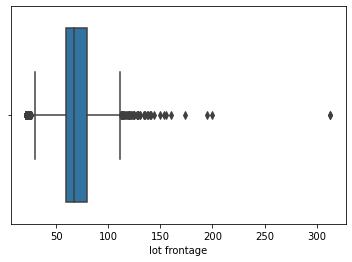

In [2402]:
sns.boxplot(x=df['lot frontage']) ;  # Looks like there are some above 300


In [2403]:
df[df['lot frontage']>300]   # There are two, but they are irregular shapes, and nothing else stands out as odd.  Ignoring

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
960,4692,950,0,NA,3,1Fam,TA,Gd,2.0,0.0,Ex,466.0,5644.0,0.0,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,Ex,Stucco,Stucco,NA,Gd,3,PConc,2,Typ,1418.0,2.0,TA,Fin,TA,Attchd,2008.0,5642,1,GasA,Ex,2Story,1499,1,Ex,Bnk,Gtl,63887,Corner,313.0,IR3,0,60,RL,796.0,Stone,NA,0,1,Edwards,292,5,10,908154235,Y,480,Gd,ClyTile,Hip,New,160000,0,Pave,12,6110.0,AllPub,214,2008,2008,2008
1335,2069,0,0,NA,4,1Fam,TA,Gd,1.0,0.0,Gd,160.0,425.0,0.0,GLQ,Unf,Y,PosA,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NA,Gd,1,CBlock,2,Typ,505.0,2.0,TA,RFn,TA,Attchd,1960.0,2069,0,GasA,Ex,1Story,1266,1,Gd,HLS,Mod,27650,Inside,313.0,IR2,0,20,RL,0.0,None,NA,0,11,NAmes,0,7,7,535427070,Y,0,NA,Tar&Grv,Flat,WD,242000,0,Pave,9,585.0,AllPub,0,1960,2007,2008


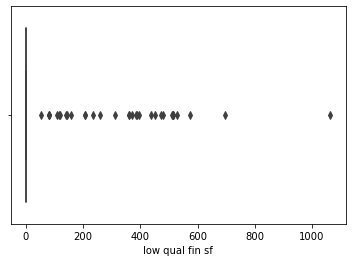

In [2404]:
sns.boxplot(x=df['low qual fin sf']) ;  # Looks like there are some above 1000


In [2405]:
df[df['low qual fin sf']>1000]   #overall condition and overall are mediocre. Maybe this is jsut a potential flip.  Nothing else stands out.  Ignoring.

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
828,1313,0,0,Grvl,3,1Fam,TA,No,0.0,0.0,TA,1313.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,432,TA,TA,MetalSd,MetalSd,NA,TA,1,BrkTil,2,Min2,528.0,2.0,TA,Unf,TA,Detchd,1954.0,2377,0,GasA,TA,1.5Fin,661,1,Gd,Lvl,Gtl,10410,Inside,60.0,Reg,1064,50,RL,0.0,None,NA,0,6,OldTown,0,5,4,535381040,Y,0,NA,CompShg,Gable,WD,142900,0,Pave,8,1313.0,AllPub,0,1915,1950,2009


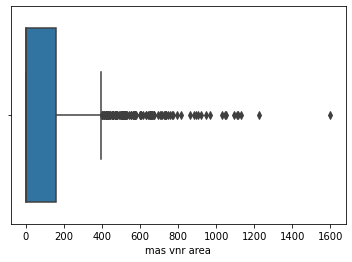

In [2406]:
sns.boxplot(x=df['mas vnr area']) ; # Looks like there are some above 1600


In [2407]:
df[df['mas vnr area']>1400]   # maybe brick facad across the whole house, sales price and overall qual are a bit elevated.  Ignoring

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1409,975,975,0,Pave,3,1Fam,TA,No,0.0,0.0,Gd,326.0,649.0,0.0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,576.0,2.0,TA,RFn,TA,Detchd,1997.0,1950,1,GasA,Ex,2Story,1850,1,Gd,Lvl,Gtl,7399,Inside,66.0,IR1,0,60,FV,1600.0,BrkFace,NA,0,6,Somerst,10,5,7,533241030,Y,0,NA,CompShg,Hip,WD,239000,198,Pave,7,975.0,AllPub,0,1997,1998,2007


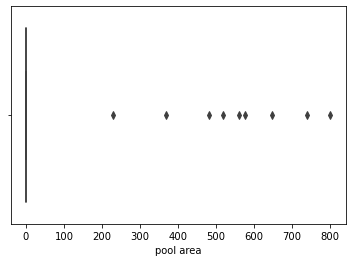

In [2408]:
sns.boxplot(x=df['pool area']) ;  # so many without pools, everything else looks fine.  Ignoring.


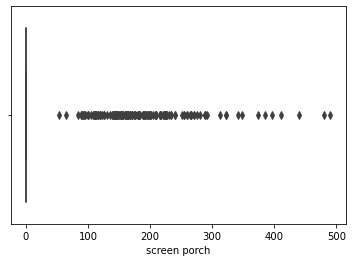

In [2409]:
sns.boxplot(x=df['screen porch']) ;   # so many without porches, everything else looks fine.  Ignoring.



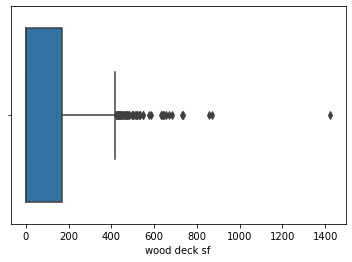

In [2410]:
sns.boxplot(x=df['wood deck sf']) ; # Looks like there are some above 1400

In [2411]:
df[df['wood deck sf']>1400]  # mayeb just a large porch? ignoring

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
966,1356,0,0,NA,3,1Fam,TA,Gd,2.0,0.0,Gd,96.0,1148.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,MnPrv,TA,1,PConc,2,Typ,528.0,2.0,TA,Fin,TA,Attchd,1977.0,1356,0,GasA,TA,SLvl,2294,1,TA,Low,Mod,15957,Corner,83.245552,IR1,0,80,RL,0.0,None,NA,0,9,Mitchel,0,6,6,923229100,Y,0,NA,CompShg,Gable,WD,188000,0,Pave,6,1244.0,AllPub,1424,1977,1977,2007


In [2412]:
# Looking at the documentation, we can binarize 'Street' and 'Central Air' 

In [2413]:
df['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [2414]:
df['central air'].value_counts()

Y    1910
N     141
Name: central air, dtype: int64

In [2415]:
df['street'] = df['street'].map({'Pave':1, 'Grvl':0})
df_test['street'] = df_test['street'].map({'Pave':1, 'Grvl':0})

In [2416]:
df['central air'] = df['central air'].map({'Y':1, 'N':0})
df_test['central air'] = df_test['central air'].map({'Y':1, 'N':0})

In [2417]:
df['street'].value_counts()

1    2044
0       7
Name: street, dtype: int64

In [2418]:
df['central air'].value_counts()

1    1910
0     141
Name: central air, dtype: int64

In [2419]:
df.isnull().sum()

1st flr sf         0
2nd flr sf         0
3ssn porch         0
alley              0
bedroom abvgr      0
bldg type          0
bsmt cond          0
bsmt exposure      0
bsmt full bath     0
bsmt half bath     0
bsmt qual          0
bsmt unf sf        0
bsmtfin sf 1       0
bsmtfin sf 2       0
bsmtfin type 1     0
bsmtfin type 2     0
central air        0
condition 1        0
condition 2        0
electrical         0
enclosed porch     0
exter cond         0
exter qual         0
exterior 1st       0
exterior 2nd       0
fence              0
fireplace qu       0
fireplaces         0
foundation         0
full bath          0
functional         0
garage area        0
garage cars        0
garage cond        0
garage finish      0
garage qual        0
garage type        0
garage yr blt      0
gr liv area        0
half bath          0
heating            0
heating qc         0
house style        0
id                 0
kitchen abvgr      0
kitchen qual       0
land contour       0
land slope   

In [2420]:
df_test.isnull().sum()

id                 0
pid                0
ms subclass        0
ms zoning          0
lot frontage       0
lot area           0
street             0
alley              0
lot shape          0
land contour       0
utilities          0
lot config         0
land slope         0
neighborhood       0
condition 1        0
condition 2        0
bldg type          0
house style        0
overall qual       0
overall cond       0
year built         0
year remod/add     0
roof style         0
roof matl          0
exterior 1st       0
exterior 2nd       0
mas vnr type       0
mas vnr area       0
exter qual         0
exter cond         0
foundation         0
bsmt qual          0
bsmt cond          0
bsmt exposure      0
bsmtfin type 1     0
bsmtfin sf 1       0
bsmtfin type 2     0
bsmtfin sf 2       0
bsmt unf sf        0
total bsmt sf      0
heating            0
heating qc         0
central air        0
electrical         1
1st flr sf         0
2nd flr sf         0
low qual fin sf    0
gr liv area  

In [2421]:
####****************************************************************************######

In [2422]:
obj_cols = df.dtypes[df.dtypes == 'object'].index
obj_cols

Index(['alley', 'bldg type', 'bsmt cond', 'bsmt exposure', 'bsmt qual',
       'bsmtfin type 1', 'bsmtfin type 2', 'condition 1', 'condition 2',
       'electrical', 'exter cond', 'exter qual', 'exterior 1st',
       'exterior 2nd', 'fence', 'fireplace qu', 'foundation', 'functional',
       'garage cond', 'garage finish', 'garage qual', 'garage type',
       'garage yr blt', 'heating', 'heating qc', 'house style', 'kitchen qual',
       'land contour', 'land slope', 'lot config', 'lot shape', 'ms zoning',
       'mas vnr type', 'misc feature', 'neighborhood', 'paved drive',
       'pool qc', 'roof matl', 'roof style', 'sale type', 'total bsmt sf',
       'utilities'],
      dtype='object')

In [2423]:
# accoring to documentation, these columns are ordinal. So we should be able to assign meaningful values where they aren't already numeric
# Lot Shape, Utilities, Land Slope, Overall Qual (num), Overall Cond(num), Exter Qual, Exter Cond, Bsmt Qual, 
# Bsmt Cond, Bsmt Exposure, BsmtFin Type 1,BsmtFinType 2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC, Fence 

# it looks like Fireplace Qu, Garage Qual, Garage Cond,  Pool QC, Fence all use the same scale
# so do BsmtFin Type 1, and BsmtFinType 2
# so do Exter Qual, Exter Cond, KitchenQual
# so do Bsmt Qual, Bsmt Cond

In [2424]:
df['fireplace qu'].value_counts()

NA    1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: fireplace qu, dtype: int64

In [2425]:
fix_dict_1 = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA': 0} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix1 = ['fireplace qu','garage qual','garage cond','pool qc','fence']  # create a list of the columns to fix

In [2426]:
for col in cols_to_fix1:
    df[col] = df[col].replace(fix_dict_1)
    df_test[col] = df_test[col].replace(fix_dict_1)

In [2427]:
df['bsmtfin type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin type 1, dtype: int64

In [2428]:
fix_dict_2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix2 = ['bsmtfin type 1','bsmtfin type 2']  # create a list of the columns to fix

In [2429]:
for col in cols_to_fix2:
    df[col] = df[col].replace(fix_dict_2)
    df_test[col] = df_test[col].replace(fix_dict_2)

In [2430]:
fix_dict_3 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix3 = ['exter qual','exter cond','kitchen qual','heating qc']  # create a list of the columns to fix

In [2431]:
for col in cols_to_fix3:
    df[col] = df[col].replace(fix_dict_3)
    df_test[col] = df_test[col].replace(fix_dict_3)

In [2432]:
fix_dict_4 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix4 = ['bsmt qual', 'bsmt cond']  # create a list of the columns to fix

In [2433]:
for col in cols_to_fix4:
    df[col] = df[col].replace(fix_dict_4)
    df_test[col] = df_test[col].replace(fix_dict_4)

In [2434]:
###  all of the rest are on different scales, so we could throw them all in one dictionary and then use the one big dictionary to update the remaining columns

In [2435]:
fix_dict_5= {
    #lot shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
#garage finish    
    'Fin':3,
    'RFn':2,
    'Unf':1,
    'NA':0,
#utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,   
#land slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
#paved drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
#electrical
    'SBrkr':5,
    'FuseA':4,
    'FuseF':3,
    'FuseP':2,
    'Mix':1,
#fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1,
#functional
    'Typ':8,
    'Min1':7,
    'Min2':6,
    'Mod':5,
    'Maj1':4,
    'Maj2':3,
    'Sev':2,
    'Sal':1}

In [2436]:
cols_to_fix5 = ['lot shape','garage finish','utilities','land slope','paved drive','electrical','fence','functional']  # create a list of the columns to fix

In [2437]:
for col in cols_to_fix5:
    df[col] = df[col].replace(fix_dict_5)
    df_test[col] = df_test[col].replace(fix_dict_5)

In [2438]:
# Dummies for Neighbors

In [2439]:
df=pd.get_dummies(df, columns=['neighborhood'], drop_first=False)

In [2440]:
df_test=pd.get_dummies(df_test, columns=['neighborhood'], drop_first=False)

In [2441]:
# Dummies for Condition

In [2442]:
df=pd.get_dummies(df, columns=['condition 1','condition 2'], drop_first=False)

In [2443]:
df_test=pd.get_dummies(df_test, columns=['condition 1','condition 2'], drop_first=False)

In [2444]:
# Dummies for bldg type and house style

In [2445]:
df=pd.get_dummies(df, columns=['bldg type','house style'], drop_first=False)

In [2446]:
df_test=pd.get_dummies(df_test, columns=['bldg type','house style'], drop_first=False)

In [2447]:
# Dummies for misc other cols

In [2448]:
df=pd.get_dummies(df, columns=['alley','bsmt exposure','exterior 1st','exterior 2nd','foundation','garage type','heating','land contour','roof matl','roof style','sale type','mas vnr type','ms zoning','lot config'], drop_first=False)

In [2449]:
df_test=pd.get_dummies(df_test, columns=['alley','bsmt exposure','exterior 1st','exterior 2nd','foundation','garage type','heating','land contour','roof matl','roof style','sale type','mas vnr type','ms zoning','lot config'], drop_first=False)

In [2451]:
df_test['electrical'].value_counts()

5.0    813
4.0     48
3.0     15
2.0      1
Name: electrical, dtype: int64

In [2464]:
df_test[df_test['id']==1578]

,id,pid,ms subclass,lot frontage,lot area,street,lot shape,utilities,land slope,overall qual,overall cond,year built,year remod/add,mas vnr area,exter qual,exter cond,bsmt qual,bsmt cond,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_idotrr,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition 1_artery,condition 1_feedr,condition 1_norm,condition 1_posa,condition 1_posn,condition 1_rrae,condition 1_rran,condition 1_rrne,condition 1_rrnn,condition 2_feedr,condition 2_norm,condition 2_posa,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,alley_grvl,alley_na,alley_pave,bsmt exposure_av,bsmt exposure_gd,bsmt exposure_mn,bsmt exposure_na,bsmt exposure_no,exterior 1st_asbshng,exterior 1st_asphshn,exterior 1st_brkcomm,exterior 1st_brkface,exterior 1st_cemntbd,exterior 1st_hdboard,exterior 1st_metalsd,exterior 1st_plywood,exterior 1st_precast,exterior 1st_stucco,exterior 1st_vinylsd,exterior 1st_wd sdng,exterior 1st_wdshing,exterior 2nd_asbshng,exterior 2nd_asphshn,exterior 2nd_brk cmn,exterior 2nd_brkface,exterior 2nd_cblock,exterior 2nd_cmentbd,exterior 2nd_hdboard,exterior 2nd_imstucc,exterior 2nd_metalsd,exterior 2nd_other,exterior 2nd_plywood,exterior 2nd_precast,exterior 2nd_stucco,exterior 2nd_vinylsd,exterior 2nd_wd sdng,exterior 2nd_wd shng,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage type_2types,garage type_attchd,garage type_basment,garage type_builtin,garage type_carport,garage type_detchd,garage type_na,heating_floor,heating_gasa,heating_gasw,heating_grav,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,roof matl_compshg,roof matl_metal,roof matl_roll,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_vwd,sale type_wd,mas vnr type_brkcmn,mas vnr type_brkface,mas vnr type_cblock,mas vnr type_none,mas vnr type_stone,ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside
634,1578,916386080,80,73.0,9735,1,4,4,3,5,5,2006,2007,0.0,3,3,4,3,1,0,1,0,384,384,4,1,NaN,754,640,0,1394,0,0,2,1,3,1,4,7,8,0,0,2007.0,3,2,400,3,3,2,100,0,0,0,0,0,0,0,NA,0,5,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [2465]:
df_test['electrical'] = df_test['electrical'].fillna(0) 

In [2466]:
print('Finished')

Finished


In [2467]:
df.columns = df.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

In [2468]:
df_test.head()

,id,pid,ms subclass,lot frontage,lot area,street,lot shape,utilities,land slope,overall qual,overall cond,year built,year remod/add,mas vnr area,exter qual,exter cond,bsmt qual,bsmt cond,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_idotrr,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition 1_artery,condition 1_feedr,condition 1_norm,condition 1_posa,condition 1_posn,condition 1_rrae,condition 1_rran,condition 1_rrne,condition 1_rrnn,condition 2_feedr,condition 2_norm,condition 2_posa,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,alley_grvl,alley_na,alley_pave,bsmt exposure_av,bsmt exposure_gd,bsmt exposure_mn,bsmt exposure_na,bsmt exposure_no,exterior 1st_asbshng,exterior 1st_asphshn,exterior 1st_brkcomm,exterior 1st_brkface,exterior 1st_cemntbd,exterior 1st_hdboard,exterior 1st_metalsd,exterior 1st_plywood,exterior 1st_precast,exterior 1st_stucco,exterior 1st_vinylsd,exterior 1st_wd sdng,exterior 1st_wdshing,exterior 2nd_asbshng,exterior 2nd_asphshn,exterior 2nd_brk cmn,exterior 2nd_brkface,exterior 2nd_cblock,exterior 2nd_cmentbd,exterior 2nd_hdboard,exterior 2nd_imstucc,exterior 2nd_metalsd,exterior 2nd_other,exterior 2nd_plywood,exterior 2nd_precast,exterior 2nd_stucco,exterior 2nd_vinylsd,exterior 2nd_wd sdng,exterior 2nd_wd shng,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage type_2types,garage type_attchd,garage type_basment,garage type_builtin,garage type_carport,garage type_detchd,garage type_na,heating_floor,heating_gasa,heating_gasw,heating_grav,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,roof matl_compshg,roof matl_metal,roof matl_roll,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_vwd,sale type_wd,mas vnr type_brkcmn,mas vnr type_brkface,mas vnr type_cblock,mas vnr type_none,mas vnr type_stone,ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside
0,2658,902301120,190,69.000000,9142,1,4,4,3,6,8,1910,1950,0.0,3,2,2,3,1,0,1,0,1020,1020,4,0,2.0,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,1910.0,1,1,440,1,1,2,0,60,112,0,0,0,0,0,NA,0,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,2718,905108090,90,67.496377,9662,1,3,4,3,5,4,1977,1977,0.0,3,3,4,3,1,0,1,0,1967,1967,3,1,5.0,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,0,1977.0,

In [ ]:
################################################################################

In [ ]:
################################################################################

In [2471]:
df.to_csv('./datasets/cleaned_train.csv', index=False)

In [2472]:
df_test.to_csv('./datasets/cleaned_test.csv', index=False)

In [2324]:
## 1st model creating basic model features = ['bedroom abvgr', 'full bath', 'central air']   ### 